# Assessing Missingness in Retail Food Item Weights  

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re #regular expressions 
from fuzzywuzzy import fuzz
import glob
import os

                                                       Read in Data

Retail Data

In [2]:
Sans = pd.read_csv(r"C:\Users\medekar\Desktop\Product_Weight_Project\Confidential\Exported Data\RetailData.csv", index_col=0)
Sans.rename(columns={"Weight": "Weight Ind"}, inplace=True)

                                    Exploring Rates of Missingness in Retail Data

In [3]:
# Find Counts of Missen Values
Missen = Sans.groupby('EatwellSegment')['Weight Ind'].value_counts().rename('Prod Count', inplace=True).copy()
Miss = pd.DataFrame(Missen).reset_index()

# Find Total Counts of All Categories 
Miss['Total Prod Count'] = Miss.groupby('EatwellSegment')['Prod Count'].transform('sum')
#Miss

## Oils & Spreads had no missen weights

                                                Calculating % of missingness

In [4]:
Zero = Miss[Miss['Weight Ind'] == 0]

In [5]:
Zero['EatwellSegment'] = Zero['EatwellSegment'].str.capitalize()

C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\3007336200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zero['EatwellSegment'] = Zero['EatwellSegment'].str.capitalize()


In [6]:
Zero['%Missen'] = Zero['Prod Count'] / Zero['Total Prod Count'] * 100 

C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\2680874287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zero['%Missen'] = Zero['Prod Count'] / Zero['Total Prod Count'] * 100


                            Visualising Rates of Missingness by Eat Well Classifications

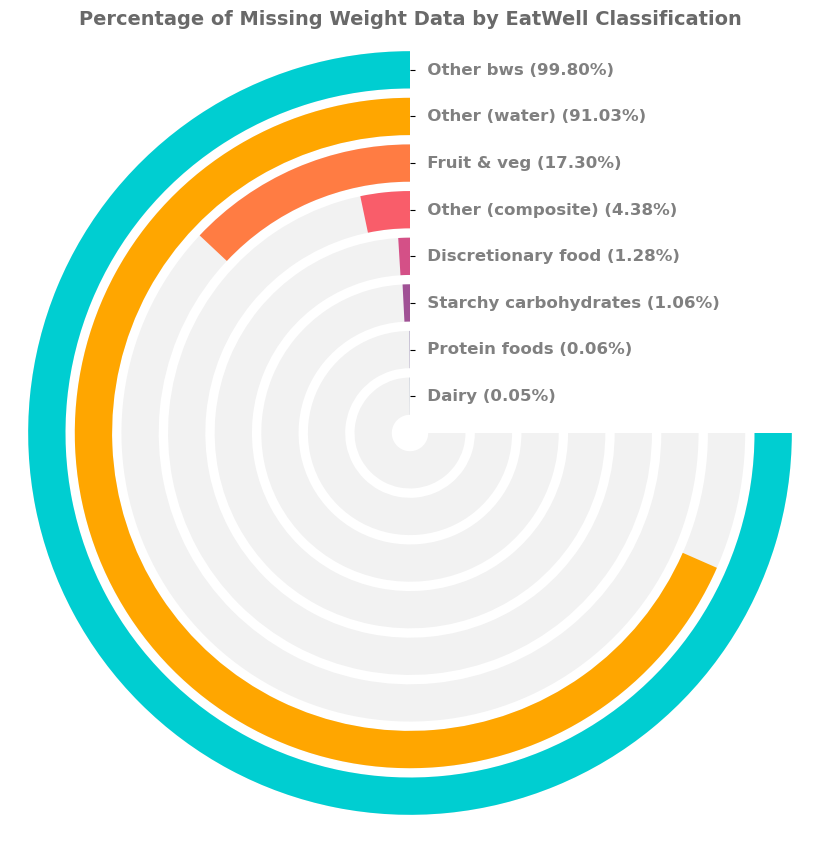

CPU times: total: 1 s
Wall time: 1.12 s


In [7]:
%%time
# Load data into pandas dataframe
df = Zero.sort_values(by="%Missen", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df['%Missen'])
ring_colours = ['#2f4b7c', '#665191', '#a05195', '#d45087',
                '#f95d6a', '#ff7c43', '#ffa600', '#00CED1']
ring_labels = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df['EatwellSegment']), list(df['%Missen']))]

data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring * 1.5 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7], labels=ring_labels, angle=0,
                    fontsize=12, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['%Missen'])[i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours[i])


# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by EatWell Classification", fontsize=14, fontweight='bold', color = 'dimgray')

# Show the plot
plt.show()
#plt.savefig(r'C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClassMiss.png', dpi=300, bbox_inches='tight')

## Visualising Hierarchy of Missingness over Varying Food Classifications

I want to be able to find what percentage of Food group category is missen by CriteraSet and then by Eat Well Classification. I think this would be the best way to visualise missingness across classifications

                                                Missingness by CriteraSet

In [8]:
pd.set_option('display.max_rows', None)

# Find Counts of Missen Values
critm = Sans.groupby(['CriteraSet','EatwellSegment'])['Weight Ind'].value_counts().rename('Prod_CountCriSet', inplace=True).copy()
CriS = pd.DataFrame(critm).reset_index()
CriS

# Find Total Counts of products by FoodGroupCategory 
CriS['Total Prod Count CritSet'] = CriS.groupby('CriteraSet')['Prod_CountCriSet'].transform('sum')
MisC = CriS.loc[CriS['Weight Ind'] == 0]
MisC['EatwellSegment'] = MisC['EatwellSegment'].str.capitalize()
MisC['CriteraSet'] = MisC['CriteraSet'].str.capitalize()
MisC

# Find Total Percentages of Missingness by FoodGroupCategory 
MisC['%Missen CritSet'] = MisC['Prod_CountCriSet'] / MisC['Total Prod Count CritSet'] * 100 
#MisC

C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\3352825893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisC['EatwellSegment'] = MisC['EatwellSegment'].str.capitalize()
C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\3352825893.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisC['CriteraSet'] = MisC['CriteraSet'].str.capitalize()
C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\3352825893.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

                                                Visualising by CriteraSet

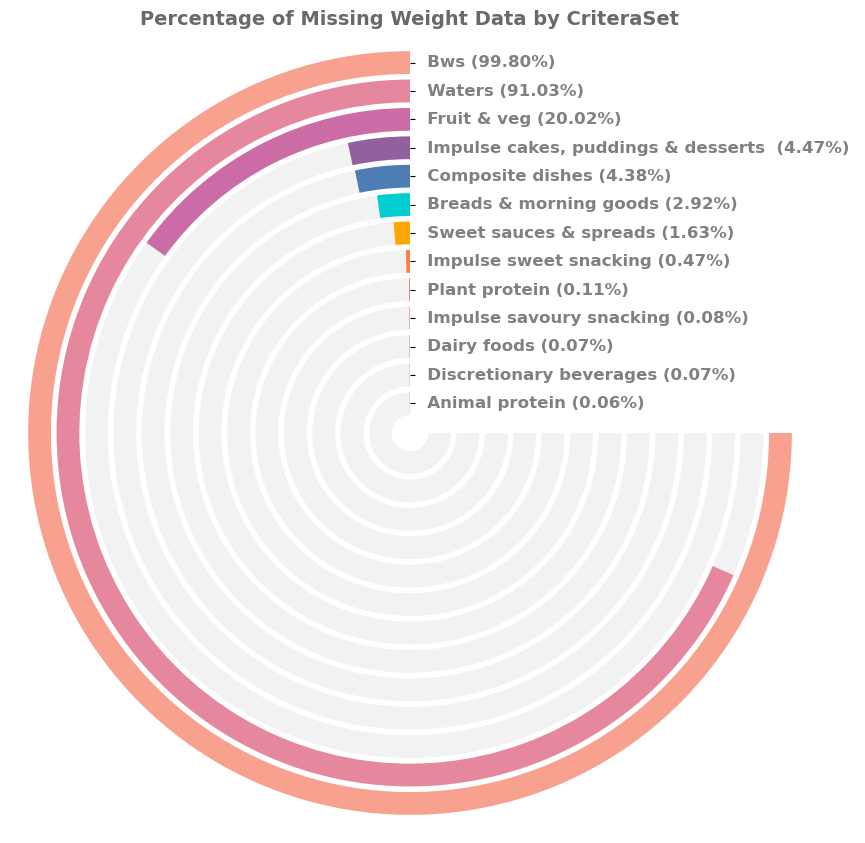

CPU times: total: 1.3 s
Wall time: 1.31 s


In [9]:
%%time
# Load data into pandas dataframe
df1 = MisC.sort_values(by="%Missen CritSet", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df1['%Missen CritSet'])
ring_colours1 = ['#2f4b7c', '#665191', '#a05195', '#d45087',  
                 '#f95d6a', '#ff7c43', '#ffa600', '#00CED1',
                 '#4d7db3', '#91609d', '#cc6ca7', '#e5879d', 
                 '#f9a18f']

ring_labels1 = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df1['CriteraSet']), list(df1['%Missen CritSet']))]

data_len1 = len(df1)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len1):
    ax_polar_bg.barh(i, max_value_full_ring * 1.5 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], labels=ring_labels1, angle=0,
                    fontsize=12, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len1):
    ax_polar.barh(i, list(df1['%Missen CritSet'])[i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours1[i])


# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by CriteraSet", fontsize=14, fontweight='bold', color='dimgray')

# Show the plot
plt.show()

#plt.savefig(r'C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClassMiss.png', dpi=300, bbox_inches='tight')

                                             Missingness by FoodGroupCategory

In [10]:
pd.set_option('display.max_rows', None)

# Find Counts of Missen Values
Sans['FoodGroupCategory'] = Sans['FoodGroupCategory'].str.capitalize()
FMissH = Sans.groupby(['FoodGroupCategory','EatwellSegment'])['Weight Ind'].value_counts().rename('Prod Count FGC', inplace=True).copy()
HMiss = pd.DataFrame(FMissH ).reset_index()
HMiss

# Find Total Counts of products by FoodGroupCategory 
HMiss['Total Prod CountbyFGC'] = HMiss.groupby('FoodGroupCategory')['Prod Count FGC'].transform('sum')
MisX = HMiss.loc[HMiss['Weight Ind'] == 0]
MisX['EatwellSegment'] = MisX['EatwellSegment'].str.capitalize()
#MisX['FoodGroupCategory'] = MisX['FoodGroupCategory'].str.capitalize()

# Find Total Percentages of Missingness by FoodGroupCategory 
MisX['%Missen_FGC'] = MisX['Prod Count FGC'] / MisX['Total Prod CountbyFGC'] * 100 
#MisX

C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\3801490953.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisX['EatwellSegment'] = MisX['EatwellSegment'].str.capitalize()
C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\3801490953.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisX['%Missen_FGC'] = MisX['Prod Count FGC'] / MisX['Total Prod CountbyFGC'] * 100


                                             Visualising by FoodGroupCategory

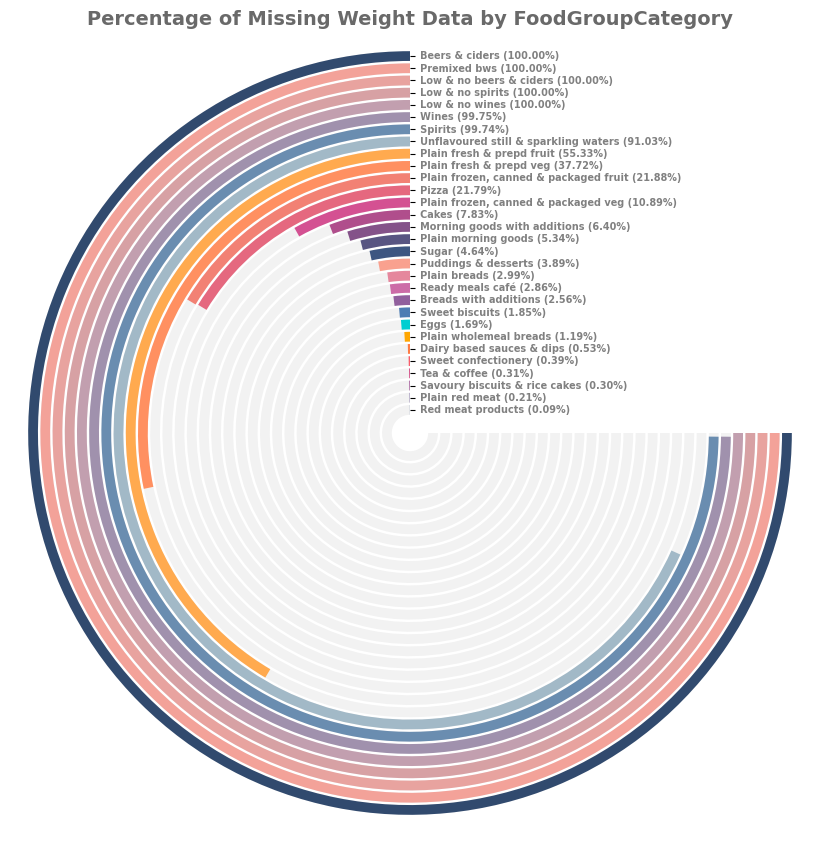

CPU times: total: 1.86 s
Wall time: 1.86 s


In [11]:
%%time
# Load data into pandas dataframe
df2 = MisX.sort_values(by="%Missen_FGC", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df2['%Missen_FGC'])
ring_colours2 = ['#2f4b7c', '#665191', '#a05195', '#d45087',  
                 '#f95d6a', '#ff7c43', '#ffa600', '#00CED1',
                 '#4d7db3', '#91609d', '#cc6ca7', '#e5879d',  
                 '#f9a18f',

                 '#3d5681', '#585582', '#845289', '#b04e8c',
                 '#d45192', '#e5687f', '#f28174', '#ff9061',
                 '#ffaa4f', '#a2b9c7', '#6a8db0', '#a091ad',
                 '#c29faf', '#d7a1a4', '#e8a39f', '#f3a299',
                 
                 '#314a6e', '#504774', '#724680', '#9d447b',
                 '#c04185', '#d85988', '#eb6d7b', '#f37e6c', 
                 '#f48f5a', '#8fb3c3', '#5e7da4', '#8d7da0',
                 '#b784a2', '#ce8ba5', '#dd979f', '#e8a199']

ring_labels2 = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df2['FoodGroupCategory']), list(df2['%Missen_FGC']))]

data_len2 = len(df2)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len2):
    ax_polar_bg.barh(i, max_value_full_ring * 1.5 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], labels=ring_labels2, angle=0,
                    fontsize=7, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len2):
    ax_polar.barh(i, list(df2['%Missen_FGC'])[i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours2[i])


# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by FoodGroupCategory", fontsize=14, fontweight='bold', color='dimgray')

# Show the plot
plt.show()

#plt.savefig(r'C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClassMiss.png', dpi=300, bbox_inches='tight')

                                                     
                                                      Join Dataframes

In [12]:
EWC = MisC.merge(Zero,on='EatwellSegment',how='left')
EWC.drop(['Prod_CountCriSet','Total Prod Count CritSet','Weight Ind_y','Prod Count','Total Prod Count'], axis=1, inplace=True)
#EWC

In [13]:
Full = MisX.merge(EWC, on='EatwellSegment',how='left')
Full.drop(['Weight Ind_x','Prod Count FGC','Total Prod CountbyFGC',], axis=1, inplace=True)
#Full

                                       Misseningness Across Classifications in a DF

In [76]:
import pandas as pd

FOrd = Full[['EatwellSegment', 'CriteraSet', 'FoodGroupCategory', 'Weight Ind', '%Missen', '%Missen CritSet', '%Missen_FGC']]

FOrd.drop('Weight Ind', axis=1, inplace=True)

#FOrd['%Missen'] = FOrd['%Missen'].apply(lambda x: f'{round(x, 3)}')
#FOrd['%Missen CritSet'] = FOrd['%Missen CritSet'].apply(lambda x: f'{round(x, 3)}')
#FOrd['%Missen_FGC'] = FOrd['%Missen_FGC'].apply(lambda x: f'{round(x, 3)}')

FOrd.set_index(['EatwellSegment', 'CriteraSet', 'FoodGroupCategory']).groupby(['EatwellSegment', 'CriteraSet', 'FoodGroupCategory']).sum()

C:\Users\medekar\AppData\Local\Temp\ipykernel_16248\963368790.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



%Missen  \
EatwellSegment        CriteraSet                          FoodGroupCategory                                  
Dairy                 Dairy foods                         Dairy based sauces & dips               0.051230   
Discretionary food    Discretionary beverages             Cakes                                   1.278936   
                                                          Puddings & desserts                     1.278936   
                                                          Sugar                                   1.278936   
                                                          Sweet biscuits                          1.278936   
                                                          Sweet confectionery                     1.278936   
                                                          Tea & coffee                            1.278936   
                      Impulse cakes, puddings & desserts  Cakes                                   1.278936   
                                                          Puddings & desserts                     1.278936   
                                                          Sugar                                   1.278936   
                                                          Sweet biscuits                          1.278936   
                                                          Sweet confectionery                     1.278936   
                                                          Tea & coffee                            1.278936   
                      Impulse sweet snacking              Cakes                                   1.278936   
                                                          Puddings & desserts                     1.278936   
                                                          Sugar                                   1.278936   
                                                          Sweet biscuits                          1.278936   
                                                          Sweet confectionery                     1.278936   
                                                          Tea & coffee                            1.278936   
                      Sweet sauces & spreads              Cakes                                   1.278936   
                                                          Puddings & desserts                     1.278936   
                                                          Sugar                                   1.278936   
                                                          Sweet biscuits                          1.278936   
                                                          Sweet confectionery                     1.278936   
                                                          Tea & coffee                            1.278936   
Fruit & veg           Fruit & veg                         Plain fresh & prepd fruit              17.296678   
                                                          Plain fresh & prepd veg                17.296678   
                                                          Plain frozen, canned & packaged fruit  17.296678   
                                                          Plain frozen, canned & packaged veg    17.296678   
Other (composite)     Composite dishes                    Pizza                                   4.381625   
                                                          Ready meals café                        4.381625   
Other (water)         Waters                              Unflavoured still & sparkling waters   91.034483   
Other bws             Bws                                 Beers & ciders                         99.800532   
                                                          Low & no beers & ciders                99.800532   
                                                          Low & no spirits                       99.800532   
                             

                                     Plotting Missenigness across the three Hierarchies. 

In [75]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Sort DataFrame
df_sorted = FOrd.sort_values('%Missen')

# Extract hierarchy levels
data = {}

for i, row in df_sorted.iterrows():
    level1 = row['EatwellSegment']
    level2 = row['CriteraSet']
    level3 = row['FoodGroupCategory']
    
    if level1 not in data:
        data[level1] = {}
    if level2 not in data[level1]:
        data[level1][level2] = {}
    if level3 not in data[level1][level2]:
        data[level1][level2][level3] = []

    data[level1][level2][level3].append(row['%Missen'])
    data[level1][level2][level3].append(row['%Missen CritSet'])
    data[level1][level2][level3].append(row['%Missen_FGC'])

# Create hierarchy
labels = []
parents = []
values = []

for level1, level2_data in data.items():
    level1_id = level1

    # Level 1 (calculate average)
    level1_total = np.mean([np.mean(vals) for level3_data in level2_data.values() for vals in level3_data.values()])
    labels.append(level1_id)
    parents.append('')
    values.append(level1_total)

    # Level 2 (raw percentages)
    for level2, level3_data in level2_data.items():
        level2_id = f' {level2}'

        # Append raw percentages for level 2
        for vals in level3_data.values():
            values.extend(vals)

        labels.append(level2_id)
        parents.append(level1_id)  # Set parent to level1

        # Level 3 (raw percentages)
        for level3, vals in level3_data.items():
            level3_id = f'{level2_id} - {level3}'
            values.extend(vals)

            labels.append(level3_id)
            parents.append(level2_id)  # Set parent to level2

# Create figure
fig = go.Figure(go.Sunburst(
    ids=labels,
    labels=labels,
    parents=parents,
    level='',
    values=values,
    opacity=0.8
))

# Update layout
fig.update_layout(
    title='Percentage Missing Weight Data by Hierarchy',
    width=1000,
    height=1000
)

fig.show()


Original 

In [74]:
# import pandas as pd
# import numpy as np
# import plotly.graph_objects as go

# # Sort DataFrame
# df_sorted = FOrd.sort_values('%Missen')

# # Extract hierarchy levels
# data = {}

# for i, row in df_sorted.iterrows():
#     level1 = row['EatwellSegment']
#     level2 = row['CriteraSet']
#     level3 = row['FoodGroupCategory']
    
#     if level1 not in data:
#         data[level1] = {}
#     if level2 not in data[level1]:
#         data[level1][level2] = {}
#     if level3 not in data[level1][level2]:
#         data[level1][level2][level3] = []

#     data[level1][level2][level3].append(row['%Missen'])
#     data[level1][level2][level3].append(row['%Missen CritSet'])
#     data[level1][level2][level3].append(row['%Missen_FGC'])

# # Create hierarchy
# labels = []
# parents = []
# values = []

# for level1, level2_data in data.items():
#     level1_id = level1

#     # Level 1
#     level1_total = np.mean([np.mean(vals) for level3_data in level2_data.values() for vals in level3_data.values()])
#     labels.append(level1_id)
#     parents.append('')
#     values.append(level1_total)

#     # Level 2
#     for level2, level3_data in level2_data.items():
#         level2_id = f'{level1}-{level2}'
#         level2_total = np.mean([np.mean(vals) for vals in level3_data.values()])

#         labels.append(level2_id)
#         parents.append(level1_id)  # Set parent to level1
#         values.append(level2_total)

#         # Level 3
#         for level3, vals in level3_data.items():
#             level3_id = f'{level1}-{level2}-{level3}'
#             means = np.mean(vals)

#             # Append labels, parents, values
#             labels.append(level3_id)
#             parents.append(level2_id)
#             values.append(means)

# # Create figure
# fig = go.Figure(go.Sunburst(
#     ids=labels,
#     labels=labels,
#     parents=parents,
#     level='',
#     values=values
# ))

# # Update layout
# fig.update_layout(
#     title='Percentage Missing Weight Data by Hierarchy',
#     width=1000,
#     height=1000
# )

# fig.show()


                                                    NEXT NOTEBOOK